# Fresnel Approximation

## Fresnel Integrals

The Fresnel integrals S(x) and C(x) are two transcendental functions named after Augustin-Jean Fresnel that are used in optics and are closely related to the error function (erf). They arise in the description of near-field Fresnel diffraction phenomena and are defined through the following integral representations:

$$ S(x) = \int_0^x \sin(t^2) dt \;,\;\;\;\;\; C(x) = \int_0^x \cos(t^2) dt $$

[wikipedia](https://en.wikipedia.org/wiki/Fresnel_integral)

## Euler spiral

A Euler spiral is created by the parametric plot of C(t) against S(t).


In [7]:
%pip install -q scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from scipy.special import fresnel
import matplotlib.pyplot as plt

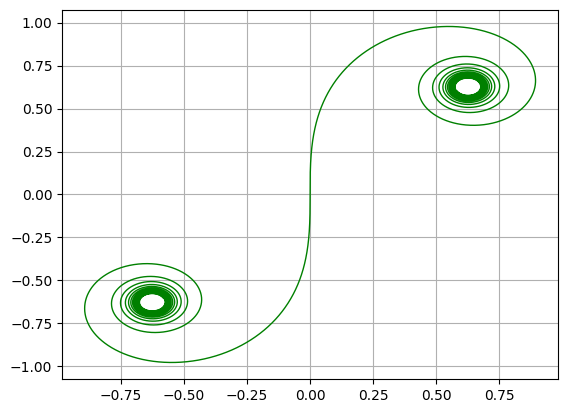

In [5]:
t = np.linspace(-10, 10, 10000)
k = np.sqrt(np.pi / 2)

s, c = fresnel(t / k)

plt.plot(s * k, c * k, 'g-', linewidth=1)

plt.grid(True)
plt.show()

## Fresnel Integrals Approximations

Use Fresnel integral derivatives to approximate Fresnal integrals.

### Fresnel Integrals Derivatives

$$ S'(x) = \sin(\frac{\pi x^2}{2}) \;,\;\;\;\;\; C'(x) =  \cos(\frac{\pi x^2}{2}) $$

### Approximations

$$ S_{approx}(x) = \frac{1}{2}-\frac{\cos(\frac{\pi x^2}{2})}{\pi x} $$

$$ C_{approx}(x) = \frac{\sin(\frac{\pi x^2}{2})}{\pi x}+\frac{1}{2} $$



In [10]:
def S_derivative(x):
    
    return np.sin((np.pi * x**2) / 2)


def C_derivative(x):
    
    return np.cos((np.pi * x**2) / 2)


def S_approx(l):

    s_approx = []
    
    for e in l:
        s_approx.append(0.5 - (C_derivative(e) / (np.pi * e)))
        
    return np.array(s_approx)


def C_approx(l):

    c_approx = []
    
    for e in l:
        c_approx.append((S_derivative(e) / (np.pi * e)) + 0.5)
        
    return np.array(c_approx)


def fresnel_approx(l):

    return S_approx(l), C_approx(l)
    

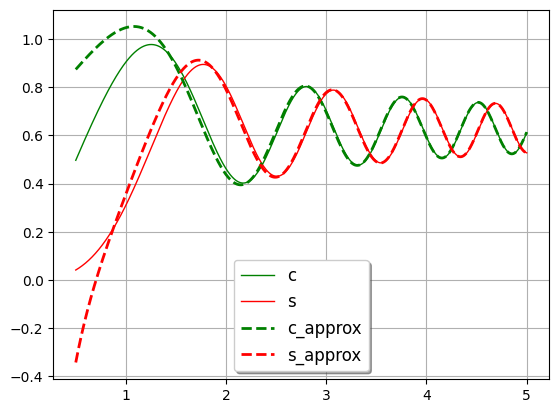

In [16]:
t = np.linspace(0.5, 5, 10000)
k = np.sqrt(np.pi / 2)

s, c               = fresnel(t / k)
s_approx, c_approx = fresnel_approx(t / k)

plt.plot(t, c * k,        'g-',  label = 'c',        linewidth=1)
plt.plot(t, s * k,        'r-',  label = 's',        linewidth=1)
plt.plot(t, c_approx * k, 'g--', label = 'c_approx', linewidth=2)
plt.plot(t, s_approx * k, 'r--', label = 's_approx', linewidth=2)

plt.legend(loc='lower center', shadow=True, fontsize='large')
plt.grid(True)
plt.show()